# Clustering
#### Author: **Christian Berdejo Sánchez**

Starting from the given dataset and the initial code provided for data loading, perform the following tasks:

Source: https://www.kaggle.com/datasets/shwetabh123/mall-customers


1. Clustering analysis with several of the studied algorithms: K-Means, Hierarchical (Agglomerative) Clustering, and DBSCAN (add any necessary libraries).
1. Run different experiments with hyperparameters of the clustering algorithms to obtain optimized groupings.
1. Generate visualizations (e.g., scatter plots, heatmaps, etc.) of the results from PCA and clustering algorithms.
1. Include brief explanatory reasoning for the obtained results.
1. If we wanted it,  once the clusters are defined, we could then label each row with the results.



In [ ]:
# Install dependencies (only needed if not already installed)
!pip install numpy pandas scikit-learn matplotlib seaborn scipy


In [2]:
import pandas as pd
df = pd.read_csv('../data/Mall_Customers.csv', header='infer')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


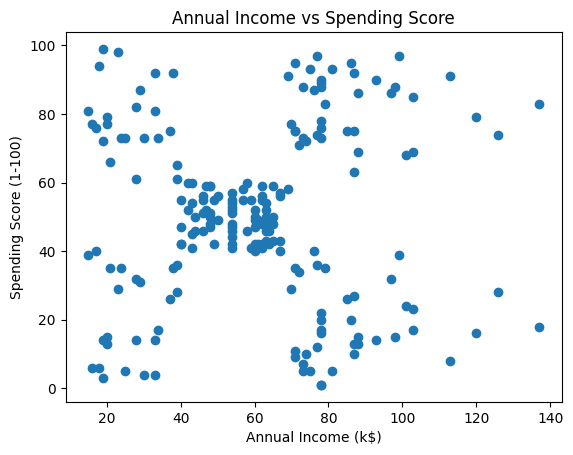

In [3]:
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()



Visually we can already view 5 possible groups, we scale using StandardScaler

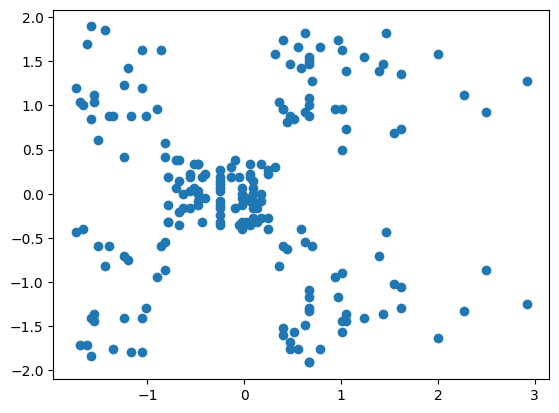

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.show()



## K means

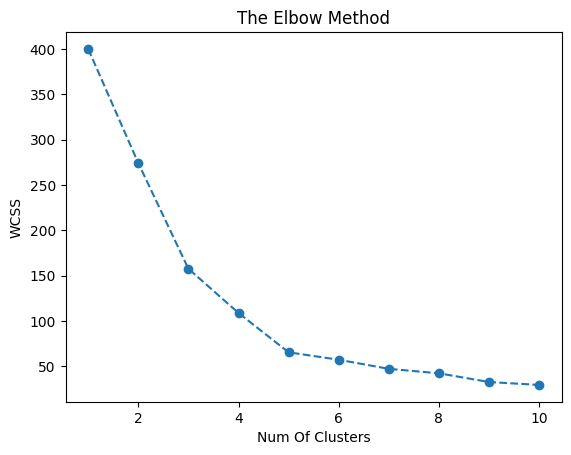

In [13]:
from sklearn.cluster import KMeans

#Elbow Method
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X_scaled)
    WCSS.append(km.inertia_)
   
plt.plot(range(1,11),WCSS, marker='o',linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the Elbow Method, the optimal number of clusters appears to be 5. Moreover, when observing the plotted points, five main groups can be identified. But we can make sure comparing with silhouette score

In [15]:
from sklearn.metrics import silhouette_score

for k in [4, 5, 6]:
    clusterer = KMeans(n_clusters=k, random_state=10)
    labels = clusterer.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {sil_score:.4f}")

  

Silhouette Score for k=4: 0.4943
Silhouette Score for k=5: 0.5539
Silhouette Score for k=6: 0.5432


We can see that the silhouette score is higher for 'k=5', therefore we can assume that 5 is the proper cluster number

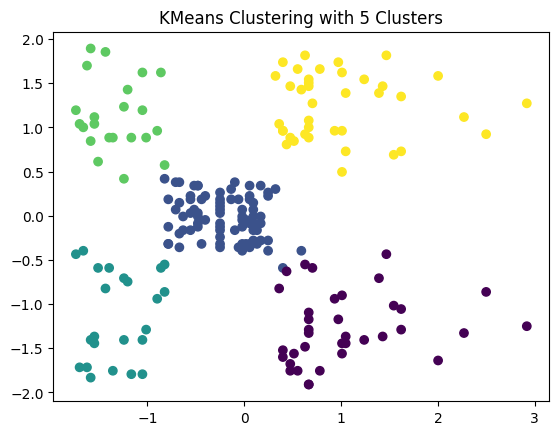

In [16]:
clusterer = KMeans(n_clusters=5, random_state=10)
y_mean = clusterer.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_mean, cmap='viridis')

plt.title('KMeans Clustering with 5 Clusters')
plt.show()

The result is great!  Of course, this dataset is quite simple.

## DBSCAN

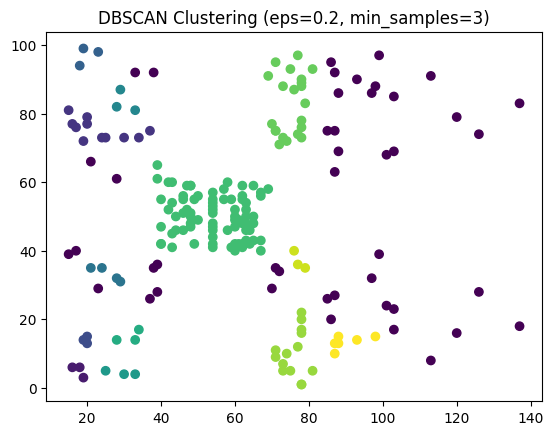

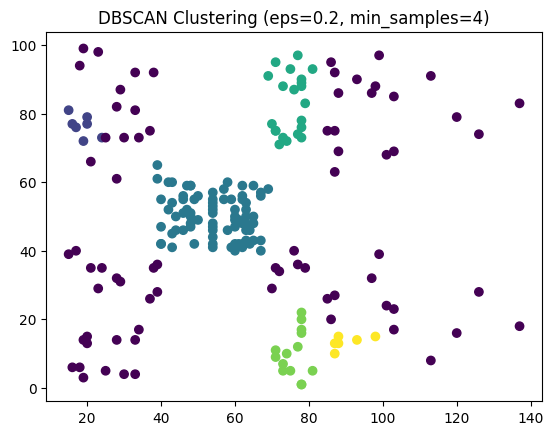

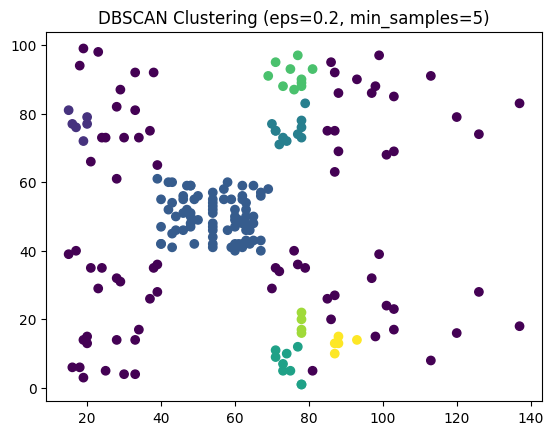

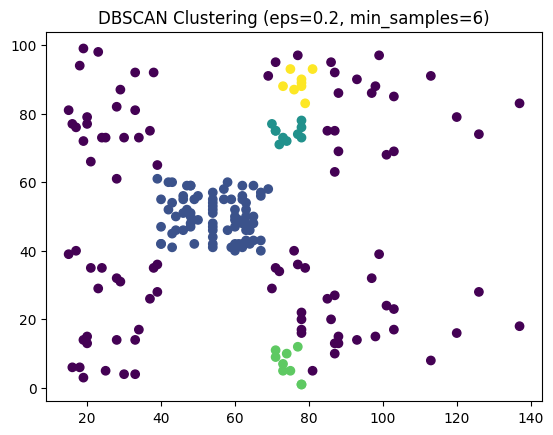

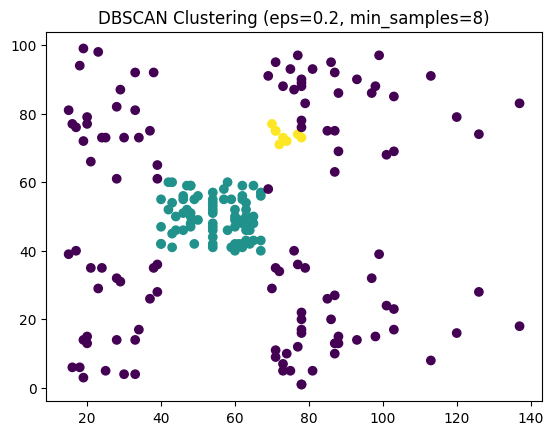

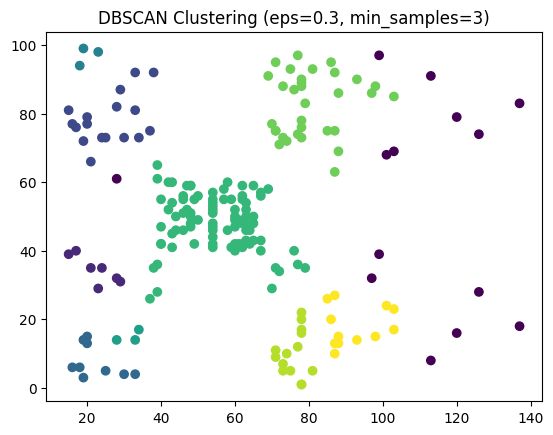

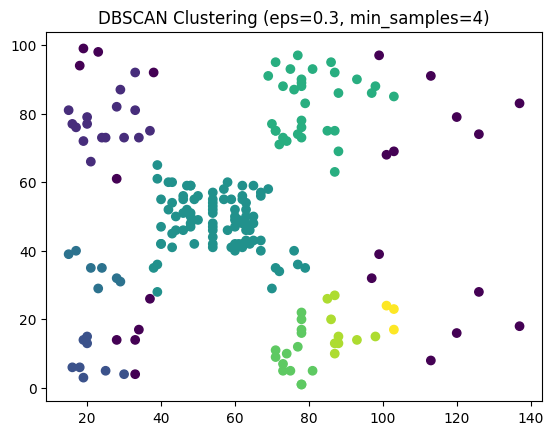

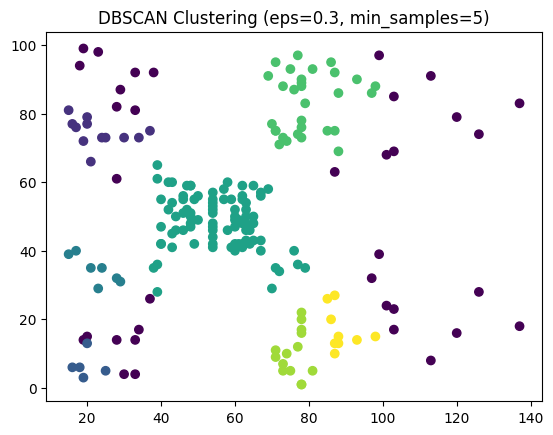

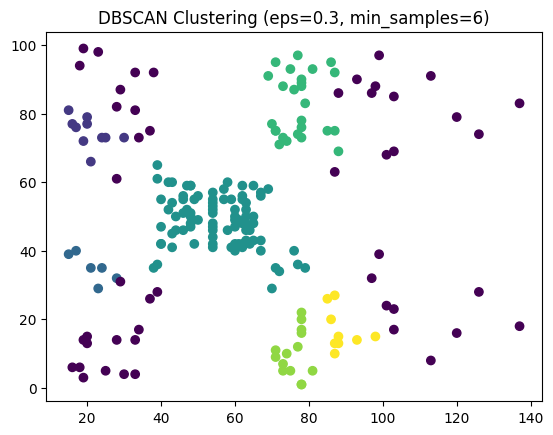

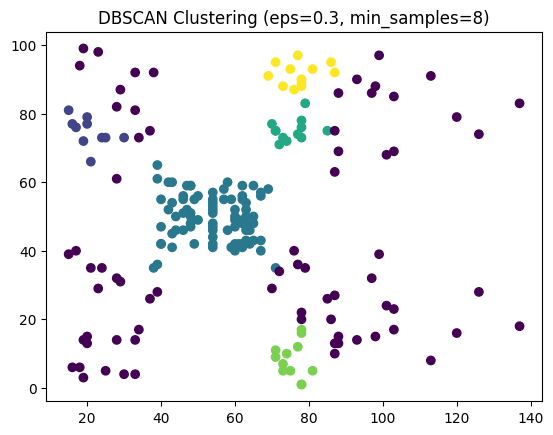

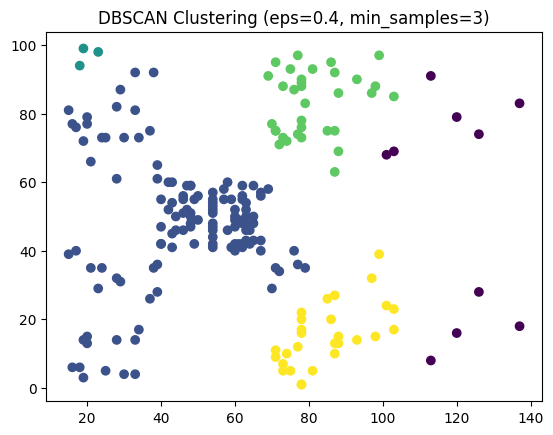

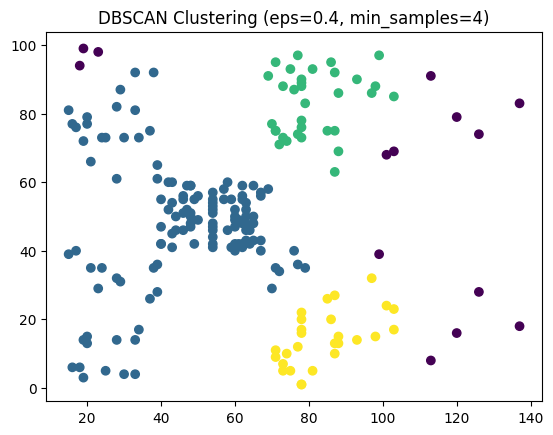

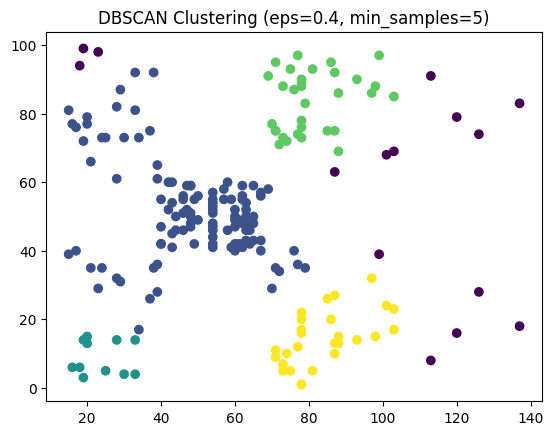

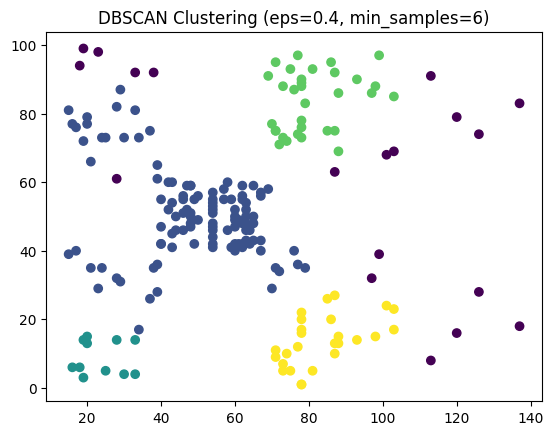

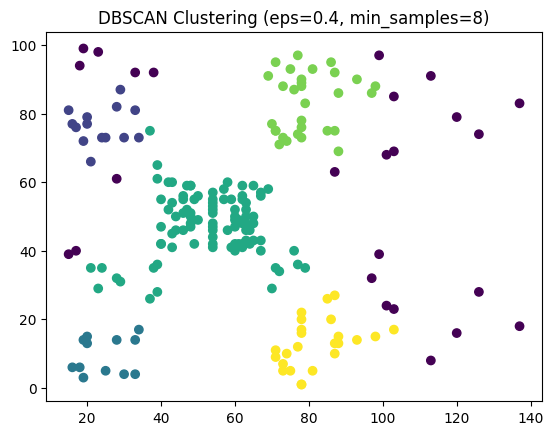

In [18]:
from sklearn.cluster import DBSCAN

param_grid = {
    'eps': [0.2, 0.3, 0.4,],
    'min_samples': [3, 4, 5, 6, 8]
}

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)
        
        # Plotting the results
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
       
        plt.show()




In [19]:
from sklearn.metrics import silhouette_score
import numpy as np

def dbscan_silhouette(X, labels):
    mask = labels != -1
    if mask.sum() > 1 and len(np.unique(labels[mask])) > 1:
        return silhouette_score(X[mask], labels[mask])
    return np.nan

for eps in param_grid['eps']:
    for ms in param_grid['min_samples']:
        labels = DBSCAN(eps=eps, min_samples=ms).fit_predict(X_scaled)
        score = dbscan_silhouette(X_scaled, labels)
        print(f"eps={eps}, min_samples={ms} → silhouette={score:.3f}")


eps=0.2, min_samples=3 → silhouette=0.470
eps=0.2, min_samples=4 → silhouette=0.617
eps=0.2, min_samples=5 → silhouette=0.586
eps=0.2, min_samples=6 → silhouette=0.614
eps=0.2, min_samples=8 → silhouette=0.603
eps=0.3, min_samples=3 → silhouette=0.472
eps=0.3, min_samples=4 → silhouette=0.520
eps=0.3, min_samples=5 → silhouette=0.524
eps=0.3, min_samples=6 → silhouette=0.530
eps=0.3, min_samples=8 → silhouette=0.593
eps=0.4, min_samples=3 → silhouette=0.395
eps=0.4, min_samples=4 → silhouette=0.458
eps=0.4, min_samples=5 → silhouette=0.478
eps=0.4, min_samples=6 → silhouette=0.490
eps=0.4, min_samples=8 → silhouette=0.549


When comparing DBSCAN and K-Means on the Mall Customers dataset, several patterns emerge:

DBSCAN achieved its best Silhouette Score around eps=0.2 with min_samples=4 (≈0.617). Although this is a relatively good score, the resulting clusters are not as clean or interpretable, with many small groups and points marked as noise. As eps increases, the score decreases and cluster separation becomes weaker.

K-Means, on the other hand, provides more stable and well-separated clusters. With k=5 (as suggested by the Elbow Method), the clusters are clearly distinguishable, compact, and align better with intuitive customer segments.

This indicates that K-Means discriminates the data structure more effectively than DBSCAN in this case. The dataset exhibits fairly spherical, evenly distributed groups — a scenario where K-Means excels — while DBSCAN is less effective because there are no strong density valleys separating clusters.

Overall, K-Means outperforms DBSCAN for this dataset, producing more interpretable clusters and a better global structure.

## Agglomerative Clustering

Linkage: ward


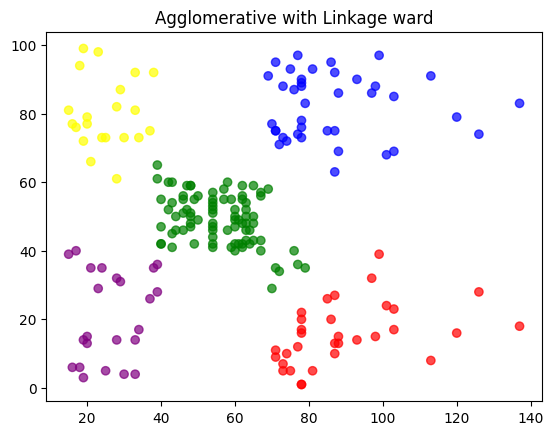

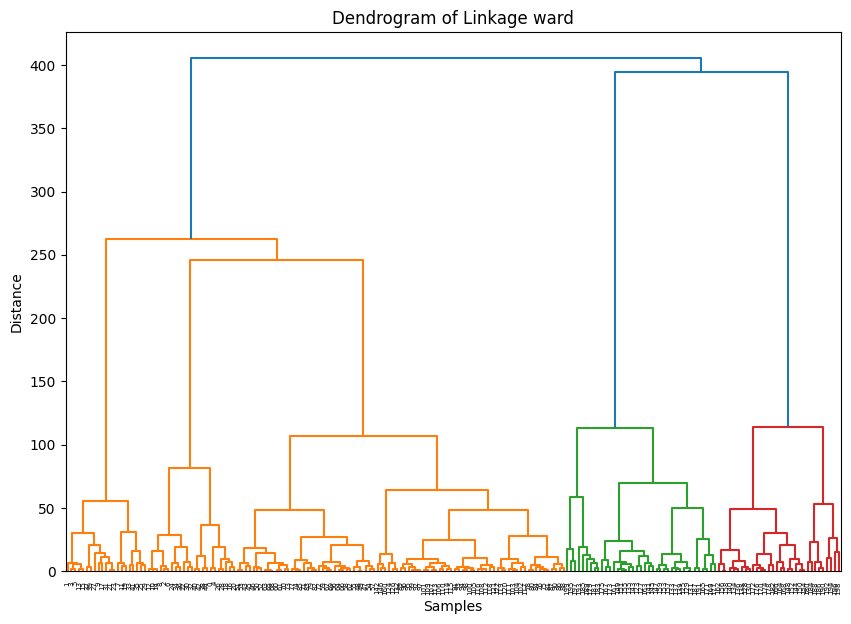

Linkage: single


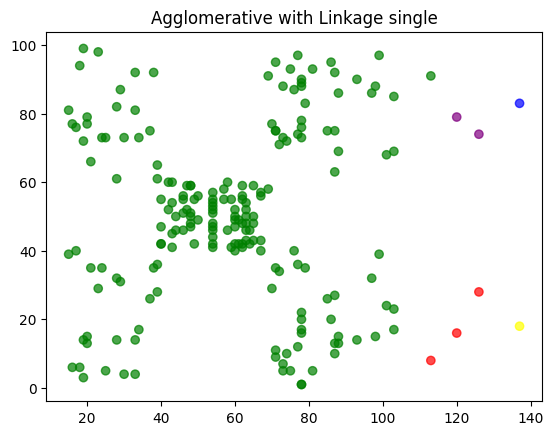

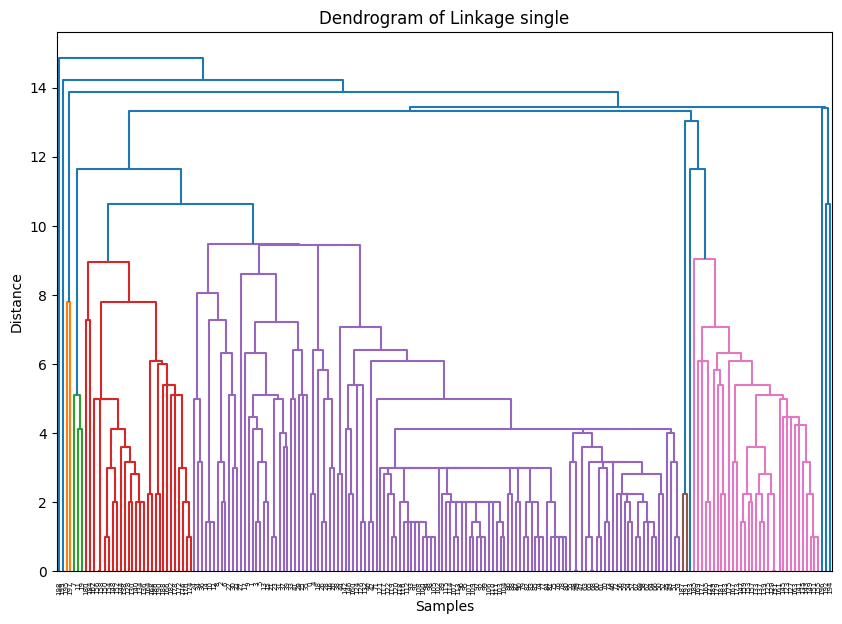

Linkage: complete


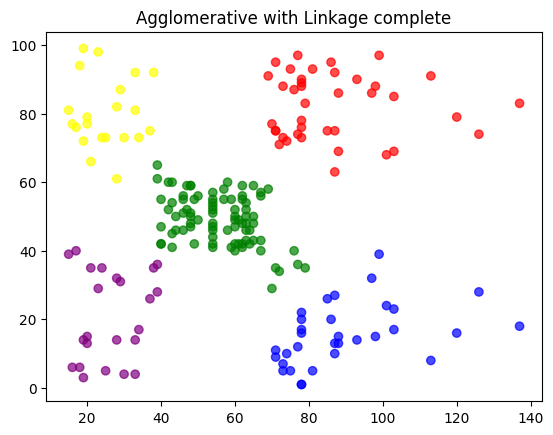

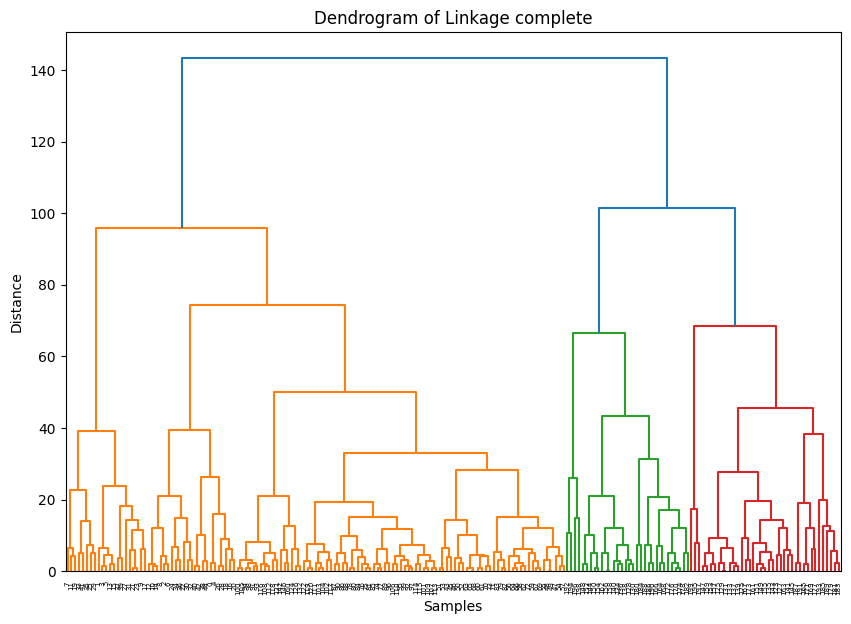

Linkage: average


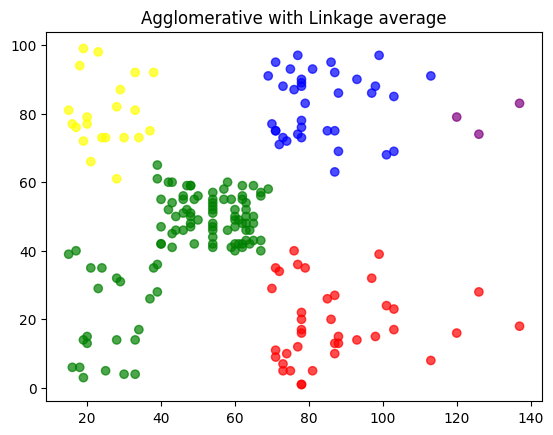

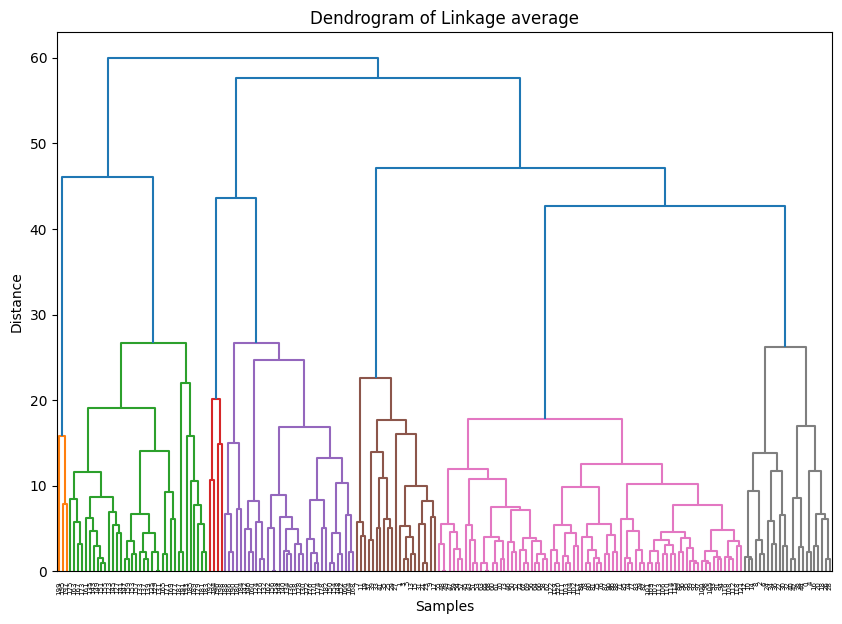

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkages = ['ward', 'single', 'complete', 'average']

for link in linkages:
    agglo = AgglomerativeClustering(n_clusters=5, linkage=link)
    agglo.fit(X)
    myColors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple',} 

    print(f"Linkage: {link}")

    plt.scatter(X[:, 0], X[:, 1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)   
    plt.title(f'Agglomerative with Linkage {link}')
    plt.show()

    # Generate the linkage matrix
    Z = linkage(X, link)

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram of Linkage {link}')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


The Agglomerative approach produces different outcomes depending on the chosen linkage criterion:

**1. Ward linkage**

- Provides the most balanced and compact clusters.
- The scatter plot shows groups that are well-separated and consistent with intuitive customer segments.
- The dendrogram clearly exhibits a natural cut at around 4–5 clusters, which supports meaningful segmentation.
- This method performs similarly to K-Means in terms of variance minimization.

**1. Single linkage**

- Suffers from the chaining effect, where points are linked sequentially, leading to one dominant cluster and a few scattered outliers.
- The dendrogram confirms this: merges happen very early with small distance increases, offering poor separation.

**1. Complete linkage**

- Produces compact clusters with similar diameters, avoiding chaining.
- However, separation is less distinct than Ward, and some clusters are forced even if the natural structure is weaker.
- The dendrogram shows a more gradual merge pattern, without a sharp “jump.”

**1. Average linkage**

- Acts as a compromise between single and complete.
- The results are reasonable, with clusters that are moderately compact and moderately well-separated.
- Still, it does not outperform Ward in terms of clarity of boundaries or interpretability.

Overall, Ward linkage is the most effective method for this dataset, producing clusters that are both compact and well-separated, with dendrograms that suggest a meaningful number of groups. Single linkage is clearly unsuitable, while complete and average linkage provide intermediate quality but less discriminative power.